<a href="https://colab.research.google.com/github/renzo-flores1/ml_algorithms/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## 1. The `cars` dataset

In this notebook, I will show you how to implement linear regression in `R`. We will be using the `cars` dataset, which has two variables: `speed` (the speed of the car in mph) and `dist` (its stopping distance in ft). There is no need to load the data, as it is already comes in with `R`. Calling `cars` would output a dataframe. In this notebook, we will regress `dist` on `speed`, because it makes sense that the stopping distance of a car depends on its speed and not the other way around. 

## 2. Exploratory Data Analysis
It is best practice to look at the data first before performing any analysis on it. So we first plot the data.

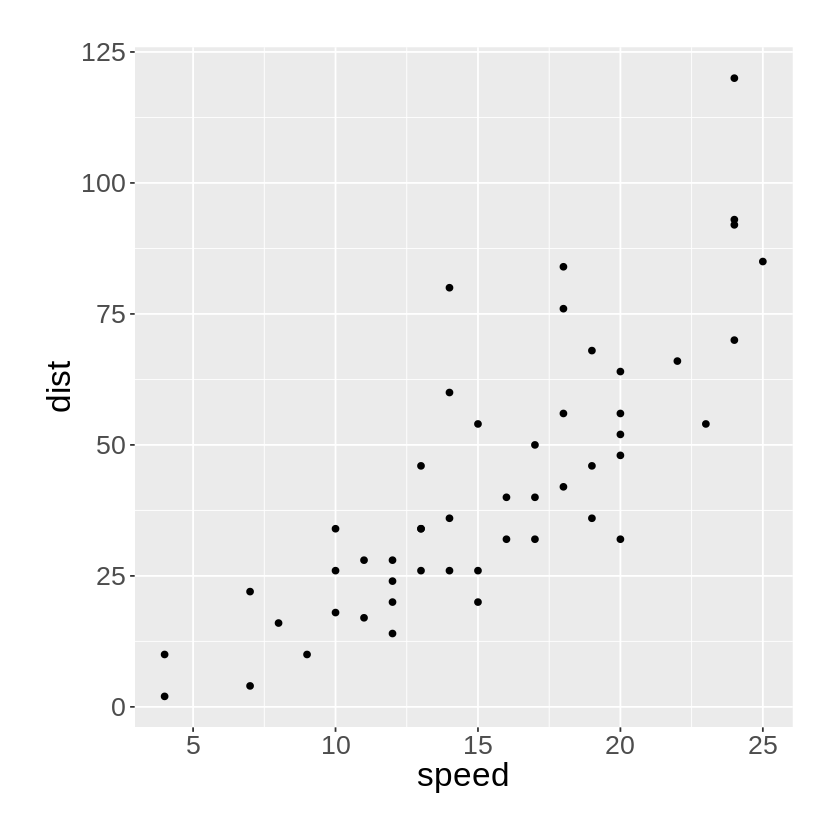

In [1]:
library(ggplot2)  # plotting library

# scatterplot
ggplot(cars, aes(x=speed, y=dist)) + geom_point() + 
      theme(text = element_text(size=20)) + 
      theme(plot.margin = unit(c(1,1,1,1), "cm"))

So, based from the graph, it can be possible that there is a linear trend between `speed` and `dist`. Moreover, it seems like there is an outlier, whose `dist` value is roughly equal to 125. Since we do not have enough background knowledge on cars, we will just leave the outlier in the data. 

## Regression Analysis

Performing regression on the `cars` dataset could not be any simpler on `R`. It can be done using the `lm` command. In this case, we type `model <- lm(dist~speed, data=cars)`. Then, typing `summary(model)` should give us a quick summary of the regression analysis.

In [2]:
# fit a linear model
model <- lm(dist ~ speed, data=cars)
summary(model)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## Confidence Intervals

Clearly, the best estimates for the parameters are $\widehat{\beta}_0 = -17.5791$ and $\widehat{\beta}_1 = 3.9324$. For the confidence intervals of these parameters, we can use the `confint` command.

In [3]:
confint(model, level=0.95)

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


Thus we see that the confidence interval for $\beta_0$ is $(-31.1679, -3.9903)$ and for $\beta_1$, its $(3.097, 4.768)$. 


## Hypothesis Testing

We also could test whether the parameters are significant. We can try and test whether the slope coefficient is significant by testing the hypotheses:

$$
\begin{align*}
&H_0: \beta_1 = 0 \\
&H_{\text{a}}: \beta_1 \ne 0\;.
\end{align*}
$$

If you're performing the test at say 95\% confidence, you simply have to look at the `Pr(>|t|)` column in the summary (also known as the $p$-value). For the slope, the $p$-value for the speed is $1.49 \times 10^{-12}$, which is way smaller than the significance level $0.05$. Thus, we reject the null hypothesis and conclude that the slope coefficient is nonzero at 95\% confidence.


## Diagnostic Plots

Now linear regression comes with four assumptions: normality, independence, heteroscedasticity, and linearity.

To check linearity, the best thing you can do is look at the scatterplot and check whether the relationship is linear. We have established earlier that the linearity assumption does not seem to be violated.

To test normality, it is best to check the quantile-quantile plot. 